# Homework 4 Regression

### Derek Anderson, Justin Dygert, Cameron Miller

### Question 1: Linear regression : NYC property sales dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # (For machine learning approach we use sklearn package)
import statsmodels.api as sm # (For econometrics approach we use statsmodels package)

sns.set()

In [3]:
rand_state= 1000

1. Change the type of the feature variables as you see fit! You can use my answer key for HW2 as a reference. 

In [4]:
df = pd.read_csv('nyc-rolling-sales_clean.csv')
df_raw = df
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

It looks like the variables have gone back to their original types. We'll use HW2 as a reference to switch their types back.

In [6]:
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET",
           "SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
               'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 
               'TAX CLASS AT TIME OF SALE', 'sale_year', 'sale_month']

for col in categorical: 
    df[col] = df[col].astype("category")
    
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BUILDING CLASS AT PRESENT       30236 non-null  category      
 5   ZIP CODE                        30236 non-null  category      
 6   RESIDENTIAL UNITS               30236 non-null  int64         
 7   COMMERCIAL UNITS                30236 non-null  int64         
 8   TOTAL UNITS                     30236 non-null  int64         
 9   LAND SQUARE FEET                30236 non-null  float64       
 10  GROSS SQUARE FEET               30236 non-null  float64       
 11  YE

Thats better!

2. Define your target variable as target= log(SALE PRICE) and add it to your data frame. Explain why this transformation would boost the performance of your linear model? 

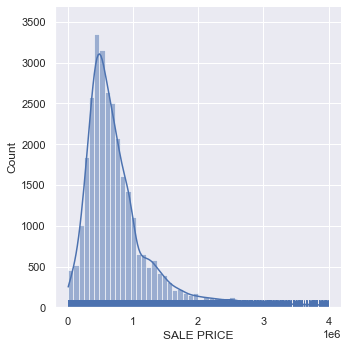

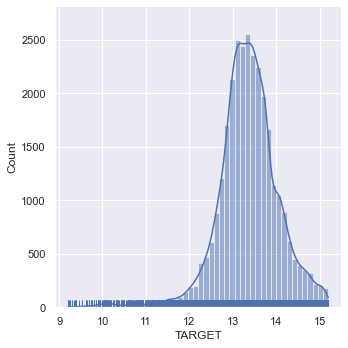

In [8]:
target = np.log(df['SALE PRICE']) 
df['TARGET'] = target

# distribution plot of sale price
sns.displot(df['SALE PRICE'], kde=True, bins=50, rug=True)
plt.show()

# distribution plot of the log of sale price
sns.displot(df['TARGET'], kde=True, bins=50, rug=True)
plt.show()

One of the critical assumptions for OLS regression is for the errors to be normal. The histogram of Sale Price without the transformation is clearly right skewed, which is a problem because it violates a critical assumption. The distribution plot for TARGET, which is the log transformed sale price, is a lot more normal and can be used.

3. Define your feature space (X). You can pick as many features as possible! it's your call!

We chose to keep Zip Code, Total Units, Land Square Feet, Gross Square Feet, Year Built, and Building Class at Time of Sale. We dont want to keep redundant variables in the model, variables like Borough and Neighborhood both represent geography in a way, zip code covers that fine. All the property types describe basically the same thing, and we only care what the property was when it was sold. Year Built uses age which is good. Total units is the total commercial and residential so if we include all three we would get multicollinearity which is no good, so we chose to just keep total units. Also, square feet is jsut a real good indicator.

In [9]:
feature = df.drop(columns = ['SALE PRICE', 'TARGET', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
               'BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 
                   'sale_year', 'sale_month', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'SALE DATE'], axis=1)

In [10]:
feature.head()

,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE
0,10009,10,2272.0,6794.0,1913,C4
1,10009,8,1750.0,4226.0,1920,C4
2,10009,4,1520.0,3360.0,1910,S3
3,10009,1,1218.0,3586.0,1899,K4
4,10011,9,1566.0,6330.0,1901,C4


We now only have 6 features.

4. Use get_dummies( drop_first=True ) function from pandas package to make the categorical variables into dummy variables. How many features you have now? wow! welcome to Machine Learning. 

In [11]:
feature = pd.get_dummies(feature, drop_first = True)
feature.head()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,ZIP CODE_10001,ZIP CODE_10002,ZIP CODE_10003,ZIP CODE_10005,ZIP CODE_10009,ZIP CODE_10010,ZIP CODE_10011,...,BUILDING CLASS AT TIME OF SALE_S9,BUILDING CLASS AT TIME OF SALE_V0,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z9
0,10,2272.0,6794.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,1750.0,4226.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,1520.0,3360.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1218.0,3586.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,1566.0,6330.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


WOW, we have 423 features now! Thats insane.

5. Split the data into test (30%) and train set (70%)

In [12]:
y = df['TARGET']
X = feature # be careful inplace= False

# This is what we used to split it.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

# checking the percentage of training set!
np.round(len(X_train)/len(X),3)

0.8

This is just verifying it was split correctly.

In [13]:
X_train.head()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,ZIP CODE_10001,ZIP CODE_10002,ZIP CODE_10003,ZIP CODE_10005,ZIP CODE_10009,ZIP CODE_10010,ZIP CODE_10011,...,BUILDING CLASS AT TIME OF SALE_S9,BUILDING CLASS AT TIME OF SALE_V0,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z9
15308,2,2500.0,1024.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30014,2,4800.0,2268.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22437,3,4000.0,2075.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14045,2,1310.0,1500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29096,1,2821.0,920.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


All our features are still there!

6. Use LinearRegression() model from Sklearn package to train the model. Do the followings:

In [14]:
reg_model = LinearRegression( )
reg_model.fit(X_train, y_train)

LinearRegression()

6.1. Save the predicted values for the test set in y_hat_test. 

In [15]:
y_hat_test = reg_model.predict(X_test)

6.2. Construct a data frame named log_predictions which has 3 columns. y_test, y_hat_test , resid.

In [16]:
log_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,y_test,y_hat_test,resid
3767,14.077875,13.800656,0.277219
24270,13.199324,13.047025,0.152300
27718,13.384728,13.308004,0.076724
6232,12.873902,13.202548,-0.328646
11161,13.710150,13.878461,-0.168311


6.3. Report the RMSE_test (RMSE in the test set)  

In [21]:
MSE_test = np.mean(np.square(log_predictions['resid']))
np.round(MSE_test,3)
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.55

We got an RMSE of .55. Thats pretty good!

7. Estimate the RMSE_test using K-Fold Cross Validation technique (try K=5 and K=10) and name them as RMSE_CV5 and RMSE_CV10. 

In [18]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [19]:
my_estimator = LinearRegression()

MSE_ten = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
MSE_five = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

RMSE_ten = np.sqrt(MSE_ten)
RMSE_five = np.sqrt(MSE_five)

This is the 10 fold RMSE:

In [20]:
RMSE_CV10 = np.mean(RMSE_ten)
np.round(RMSE_CV10,3)

0.563

This is the 5 fold RMSE:

In [21]:
RMSE_CV5 = np.mean(RMSE_five)
np.round(RMSE_CV5,3)

0.582

8. Compare RMSE_CV with  RMSE_test from part 3 and explain your observation?

RMSE_test is a little smaller than both RMSE_CV5 and RMSE_CV10. This makes sense, with how we calculate RMSE_test we usually get some overfitting and an over optomistic RMSE value, this is because we are only predicting on one new test set. With the cross validation methods, the overfitting is taken care of becuase we are predicting on multiple "unseen" test sets. 

### Question 2: Polynomial regression: Boston dataset

1. Define x= np.array(df_poly['LSTAT']) and  y= np.array(df_poly['price']). Draw a scatter plot for price vs LSTAT using x and y.

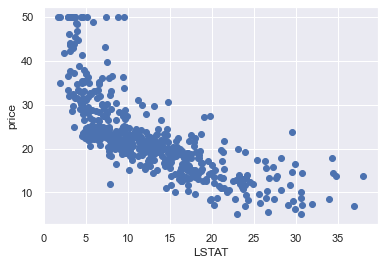

In [23]:
df2 = pd.read_csv('boston_polynomial.csv')
df2_raw = df2
df2.head()

x = np.array(df2['LSTAT'])
y = np.array(df2['price'])

plt.scatter(x, y)
plt.xlabel('LSTAT')
plt.ylabel('price')
plt.show()

It looks like the data does not follow a linear pattern, there appears to be a curve, so it likely follows a polynomial pattern.

2. Import PolynomialFeatures class from sklearn.preprocessing. Now fit_transform your x and call it X_poly. Set polynomial degree = 5.  

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5)
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


3. Split the data into test (30%) and train set (70%) 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=rand_state)

4. Use LinearRegression() model from Sklearn package to train the model. Do the followings: 

In [26]:
reg_model = LinearRegression( )
reg_model.fit(X_train, y_train)

LinearRegression()

4.1. Save the predicted values for the test set in y_hat_test.  

In [27]:
y_hat_test = reg_model.predict(X_test)

4.2. Construct a data frame named predictions which has 3 columns. y_test, y_hat_test , resid.

In [28]:
predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
predictions.head()

,y_test,y_hat_test,resid
0,21.8,21.893772,-0.093772
1,10.2,18.407885,-8.207885
2,15.2,16.240695,-1.040695
3,43.5,40.659722,2.840278
4,50.0,22.721723,27.278277


4.3. Report the RMSE_test (RMSE in the test set)  

In [29]:
MSE_test = np.mean(np.square(predictions['resid']))
np.round(MSE_test,3)
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.007

5. Estimate the RMSE_test using K-Fold Cross Validation technique (K=5 only) and name it as RMSE_CV5. 

In [30]:
my_estimator = LinearRegression()

MSE_five = -cross_val_score(estimator=my_estimator, X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

RMSE_five = np.sqrt(MSE_five)

RMSE_CV5 = np.mean(RMSE_five)
np.round(RMSE_CV5,3)

5.288

6. Use my_polynomial_regression() function from the notebook for class 7. With that function, construct a table with 3 columns: Degree (going from 1 to 10), RMSE_train and RMSE_test.   

In [31]:
def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=100):
    
    poly_features= PolynomialFeatures(degree=poly_degree)
    
    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))   
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)
    
  
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)
  
    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)
  
   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

  
    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)


  
#     print("Traning model fit")
#     print("R2_train = {}".format(R2_train))

#     print("-------------------------------------------")
#     print("MSE_train = {}".format(MSE_train))
#     print("RMSE_train = {}".format(RMSE_train))

#     print("-------------------------------------------")
#     print("MSE_test = {}".format(MSE_test))
#     print("RMSE_test = {}".format(RMSE_test))
    
    return poly_degree, RMSE_train, RMSE_test

In [33]:
returns= []
for i in range(1,11):
    returns.append(my_polynomial_regression(poly_degree=i, X=x,y=y))
    
output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,5.92,6.88
1,2,5.13,6.32
2,3,4.95,6.26
3,4,4.82,6.16
4,5,4.72,6.15
5,6,4.70,6.17
6,7,4.69,6.17
7,8,4.69,6.16
8,9,4.69,6.15
9,10,4.69,6.15


7. Use the table from part 6 and plot the RMSE_test and RMSE_train against the Degree on the horizontal axis. 

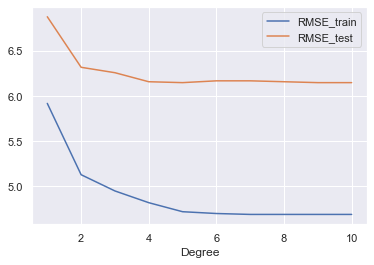

In [34]:
output.set_index('Degree').plot()
plt.show()

This chart is showing what happens to the RMSE in the test and training set when we add another degree to the polynomial.

8. What is the optimal polynomial degree based on your observations from the above table and chart in part 6 and 7 respectively. Explain your answer 

We would say 4 is the optimal polynomial degree. We picked 4 because it is the lowest RMSE found from the test set. The table shows that the values after 4 are similar, 9 and 10 are exactly the same, but 4 is more simple and should be picked. We picked 4 from the test RMSE because the training RMSE is going to be very overfit and "cheating". 